In [75]:
import pandas as pd
import numpy as np
#Imprimir la cantidad máxima de filas y columnas de un dataset
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


#Carga de DataSets

In [76]:
anime= pd.read_csv("/content/drive/Othercomputers/Mi PC/#TP4/CSV/anime.csv")
anime.shape
anime.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [77]:
anime_with_synopsis= pd.read_csv("/content/drive/Othercomputers/Mi PC/#TP4/CSV/anime_with_synopsis.csv")
anime_with_synopsis.head()
anime_with_synopsis.shape

(16214, 5)

#Separación del Género en variables Dummies




In [78]:
# Obtener una lista de géneros únicos
generos_unicos = np.unique(anime["Genres"].str.split(", ").explode())

# Crear variables dummies para cada género
generos_dummies = pd.get_dummies(anime["Genres"].str.split(", ", expand=True).stack()).sum(level=0)

# Unir el dataset original con las variables dummies
anime_con_dummies = pd.concat([anime, generos_dummies], axis=1)

# Eliminar la columna "Genres" original
anime_con_dummies.drop(columns=["Genres"], inplace=True)
anime_con_dummies.head(5)

<ipython-input-78-4f2cefb9b445>:5: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  generos_dummies = pd.get_dummies(anime["Genres"].str.split(", ", expand=True).stack()).sum(level=0)


,MAL_ID,Name,Score,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri
0,1,Cowboy Bebop,8.78,Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,6,Trigun,8.24,Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,7,Witch Hunter Robin,7.27,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,8,Bouken Ou Beet,6.98,Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [79]:
#anime_con_dummies = anime_con_dummies.sort_values("Popularity")
#anime_con_dummies.head(25)

In [80]:
anime_with_synopsis.shape

(16214, 5)

In [81]:
anime_con_dummies.replace("Unknown", np.nan, inplace=True)

In [82]:
anime_con_dummies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          12421 non-null  object
 3   English name   6997 non-null   object
 4   Japanese name  17514 non-null  object
 5   Type           17525 non-null  object
 6   Episodes       17046 non-null  object
 7   Aired          17253 non-null  object
 8   Premiered      4745 non-null   object
 9   Producers      9768 non-null   object
 10  Licensors      3946 non-null   object
 11  Studios        10483 non-null  object
 12  Source         13995 non-null  object
 13  Duration       17007 non-null  object
 14  Rating         16874 non-null  object
 15  Ranked         15800 non-null  object
 16  Popularity     17562 non-null  int64 
 17  Members        17562 non-null  int64 
 18  Favorites      17562 non-n

#Probabilidad de ocurrencia por Género

##Conteo de animés por géneros

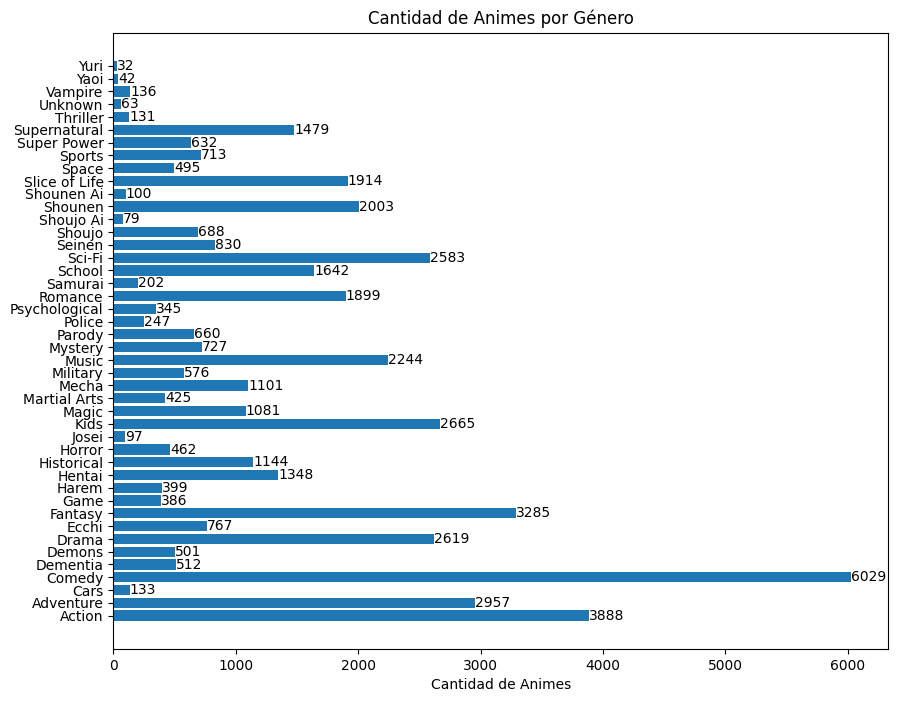

In [83]:
import matplotlib.pyplot as plt

# Supongamos que 'df' es tu DataFrame y que las columnas de género son las últimas
generos = anime_con_dummies.iloc[:, 34:] # reemplaza n con el número de columnas de género

# Suma las columnas para obtener la cantidad de animes por género
conteo_generos = generos.sum()

# Ordena la serie de forma descendente
#conteo_generos = conteo_generos.sort_values(ascending=False)

# Crea el gráfico de barras
plt.figure(figsize=(10,8))
barras = plt.barh(conteo_generos.index, conteo_generos.values)
plt.xlabel('Cantidad de Animes')
plt.title('Cantidad de Animes por Género')

# Agrega las etiquetas a las barras
for barra in barras:
    x = barra.get_width()
    y = barra.get_y() + barra.get_height() / 2
    plt.text(x, y, str(int(x)), ha='left', va='center')

plt.show()

In [84]:
generos = anime_con_dummies.iloc[:, 34:]

# Suma las columnas para obtener la cantidad de animes por género
conteo_generos = generos.sum()
conteo_generos.head()


Action       3888
Adventure    2957
Cars          133
Comedy       6029
Dementia      512
dtype: int64

In [85]:
# Transforma la serie en un DataFrame
df_generos = conteo_generos.to_frame('Cantidad')

In [86]:
# Calcula el total de animes en el DataFrame original
total_animes = len(anime_con_dummies)

# Agrega la columna 'Prob_Gen' al DataFrame 'df_generos'
df_generos['Prob_Gen'] = df_generos['Cantidad'] / total_animes

In [87]:
df_generos.head()

,Cantidad,Prob_Gen
Action,3888,0.221387
Adventure,2957,0.168375
Cars,133,0.007573
Comedy,6029,0.343298
Dementia,512,0.029154


In [88]:
#Obtener la suma de las probabilidades de ocurrencia para cada animé, en función de sus géneros.
#Parametrizar los valores de probabilidad para que la sumade todos los géneros sea 1
df_generos ["ProbP_Gen"]= df_generos['Prob_Gen'] / df_generos['Prob_Gen'].sum()
df_generos.head()

,Cantidad,Prob_Gen,ProbP_Gen
Action,3888,0.221387,0.077356
Adventure,2957,0.168375,0.058833
Cars,133,0.007573,0.002646
Comedy,6029,0.343298,0.119954
Dementia,512,0.029154,0.010187


In [89]:
#Obtener la matriz de probabilidad de ocurrencia de cada animé segun su género
Prob = anime_con_dummies.iloc[:, 34:]*df_generos["ProbP_Gen"]
Prob.head()

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri
0,0.077356,0.058833,0.0,0.119954,0.0,0.0,0.052108,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.051392,0.0,0.0,0.0,0.000000,0.0,0.0,0.009849,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.077356,0.000000,0.0,0.000000,0.0,0.0,0.052108,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.014464,0.0,0.000000,0.0,0.0,0.0,0.0,0.051392,0.0,0.0,0.0,0.000000,0.0,0.0,0.009849,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.077356,0.058833,0.0,0.119954,0.0,0.0,0.052108,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.051392,0.0,0.0,0.0,0.039852,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.077356,0.000000,0.0,0.000000,0.0,0.0,0.052108,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021508,0.0,0.0,0.0,0.0,0.014464,0.0,0.004914,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.029426,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.058833,0.0,0.000000,0.0,0.0,0.000000,0.0,0.065359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.039852,0.0,0.0,0.000000,0.0,0.0,0.029426,0.0,0.0,0.0,0.0,0.0


In [90]:
# Suma todos los valores de una fila del DataFrame 'Prob'
suma_fila = Prob.sum(axis=1)

# Agrega los resultados a una columna nueva al final del DataFrame 'Prob'
# Para obtener la probailidad total de ocurrencia de cada animé segun su genero en una lista.
Prob['Suma_Fila'] = suma_fila

In [91]:
Prob.head(5)

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri,Suma_Fila
0,0.077356,0.058833,0.0,0.119954,0.0,0.0,0.052108,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.051392,0.0,0.0,0.0,0.000000,0.0,0.0,0.009849,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.369491
1,0.077356,0.000000,0.0,0.000000,0.0,0.0,0.052108,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.014464,0.0,0.000000,0.0,0.0,0.0,0.0,0.051392,0.0,0.0,0.0,0.000000,0.0,0.0,0.009849,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.205169
2,0.077356,0.058833,0.0,0.119954,0.0,0.0,0.052108,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.051392,0.0,0.0,0.0,0.039852,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.399495
3,0.077356,0.000000,0.0,0.000000,0.0,0.0,0.052108,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021508,0.0,0.0,0.0,0.0,0.014464,0.0,0.004914,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.029426,0.0,0.0,0.0,0.0,0.0,0.199777
4,0.000000,0.058833,0.0,0.000000,0.0,0.0,0.000000,0.0,0.065359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.039852,0.0,0.0,0.000000,0.0,0.0,0.029426,0.0,0.0,0.0,0.0,0.0,0.193470


In [92]:
#Appendeo de  las probabilidades de ocurrencia de un animé segun sus Géneros a anime_con_dummies
anime_con_dummies = anime_con_dummies.join(Prob['Suma_Fila'])
anime_con_dummies.rename(columns={'Suma_Fila': 'SumaProb'}, inplace=True)

In [93]:
anime_con_dummies.head()

,MAL_ID,Name,Score,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri,SumaProb
0,1,Cowboy Bebop,8.78,Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.369491
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",NaN,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.205169
2,6,Trigun,8.24,Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.399495
3,7,Witch Hunter Robin,7.27,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.199777
4,8,Bouken Ou Beet,6.98,Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",NaN,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.193470


#Parametrización de la popularidad del Animé

In [94]:
#df_generos ["ProbP_Gen"]= df_generos['Prob_Gen'] / df_generos['Prob_Gen'].sum()
anime_con_dummies['Popul_Anim_Param'] = anime_con_dummies['Popularity']/ anime_con_dummies['Popularity'].sum()

In [95]:
anime_con_dummies.head()

,MAL_ID,Name,Score,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri,SumaProb,Popul_Anim_Param
0,1,Cowboy Bebop,8.78,Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.369491,2.534051e-07
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",NaN,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.205169,3.365740e-06
2,6,Trigun,8.24,Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.399495,1.306011e-06
3,7,Witch Hunter Robin,7.27,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.199777,9.531931e-06
4,8,Bouken Ou Beet,6.98,Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",NaN,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.193470,2.838787e-05


#Ranking de Droppeos de series
Se debe evitar que la serie se abandone, para crear una filiación del usuario a la plataforma, con mayor permanencia, mayor recolección de gustos.

In [96]:
#Creamos una nueva columna paraa determinar cual es el porcentaje de abandono por serie
anime_con_dummies ['%Droppeo'] = anime_con_dummies ['Dropped']/anime_con_dummies['Members']
anime_con_dummies['%Droppeo'].replace(0, 1, inplace=True)

In [97]:
#Ahora en Función a las demas series ese porcentaje es alto o bajo
#Parametrización del porcentaje de abandono de la serie.
anime_con_dummies ['%Drop_Param'] = anime_con_dummies ['%Droppeo']/anime_con_dummies['%Droppeo'].sum()

In [98]:
#Para que el valor más alto, afecte negativamente a la serie en el ranking, el factor debe ser su inverso.
anime_con_dummies ['%Drop_Param'] = 1/anime_con_dummies ['%Drop_Param']


#Ranking de OnHold
Dejar una serie en On Hold, implica que se ha dejado de ver la serie porque se está viendo algo mejor, por lo tanto, mientras mas chico sea es número, más atrapante la serie o pelicula, en comparación con el restoo del catálogo. Por lo que este indicador ayuda a generar Filiación con el usuario.

In [99]:
#Creamos una nueva columna paraa determinar cual es el porcentaje de abandono PASIVO por serie
anime_con_dummies ['%OnHold'] = anime_con_dummies ['On-Hold']/anime_con_dummies['Members']
anime_con_dummies['%OnHold'].replace(0, 1, inplace=True) #evitar la pérdida del indicador

In [100]:
#Ahora en Función a las demas series ese porcentaje es alto o bajo
#Parametrización del porcentaje de abandono PASIVO de la serie.
anime_con_dummies ['%OnH_Param'] = anime_con_dummies ['%OnHold']/anime_con_dummies['%OnHold'].sum()

In [101]:
#Para que el valor más bajo, afecte positivamente a la serie en el ranking, el factor debe ser su inverso.
anime_con_dummies ['%OnH_Param'] = 1/anime_con_dummies ['%OnH_Param']

#Parametrización de "Plan to watch"
Planear ver una serie implica que previamente ha sido una buena recomendación y que se ha guardado, por lo tanto, afectar de manera positiva la posición de recomendados por este factor, sería una buena suposición.

In [102]:
anime_con_dummies ['PTWatch_Param'] = anime_con_dummies ['Plan to Watch']/anime_con_dummies['Plan to Watch'].sum()

#Establecer jerarquía para una lista automática sin tener en cuenta la heterogeneidad de géneros
Con el siguientee indicador se generará una lista de los animés más recomendados para un nuevo usuario, Teniendo en cuenta:
  *Su Score
  *Popularidad
  *Las veces que fue una buena recomendación
  *Eliminando de la Lista, las series más abandonadas
  *Ponderando positivamente las series más atrapantes

Hay una diferencia en el orden de los factores utilizados para obtener el indicador final, . Se debe encontrar la manera de igualar el impacto de dichos factores, o incluso de incrementar el peso de ciertos criterios.


In [103]:
#Transforma los valores de la columna 'anime_con_dummies['Score']' de tipo object a tipo float
anime_con_dummies['Score'] = anime_con_dummies['Score'].astype(float)

In [104]:
# #Estableceremos los rangos entre los que se mueven los valores utilizados
# Rango_Parametros= [('Score_Param',
#                   'PTWatch_Param',
#                   '%OnH_Param',
#                  'Popul_Anim_Param',
#                   '%Drop_Param',
#                     'ProbP_Gen'),
#                    (anime_con_dummies ['Score_Param'].min(),
#                   anime_con_dummies['PTWatch_Param'].min(),
#                   anime_con_dummies ['%OnH_Param'].min(),
#                   anime_con_dummies ['Popul_Anim_Param'].min(),
#                   anime_con_dummies ['%Drop_Param'].min(),
#                     anime_con_dummies['SumaProb']).min(),(
#                    anime_con_dummies ['Score_Param'].max(),
#                   anime_con_dummies['PTWatch_Param'].max(),
#                   anime_con_dummies ['%OnH_Param'].max(),
#                   anime_con_dummies ['Popul_Anim_Param'].max(),
#                   anime_con_dummies ['%Drop_Param'].max(),
#                    anime_con_dummies['SumaProb'].max())]
# #Rango_Parametros= Rango_Parametros.to_frame()
# print(Rango_Parametros)

In [105]:
# Rang_Param = pd.DataFrame(Rango_Parametros)
# Rang_Param= Rang_Param.transpose()
# # Asignar nombres a las columnas
# Rang_Param.columns = ['Parametro', 'Minimo', 'Maximo']
# Rang_Param

In [106]:
#Ahora a partir del valor máximo para cada parámetro, se debiera parametriza,
#para reducir el rango del parámetro a un valor entre 0 y 1.
anime_con_dummies ['Score_Param']= anime_con_dummies ['Score']/anime_con_dummies ['Score'].max()
anime_con_dummies['PTWatch_Param']= anime_con_dummies['PTWatch_Param']/anime_con_dummies['PTWatch_Param'].max()
anime_con_dummies ['%OnH_Param']= anime_con_dummies ['%OnH_Param']/anime_con_dummies ['%OnH_Param'].max()
anime_con_dummies ['Popul_Anim_Param']= anime_con_dummies ['%OnH_Param']/anime_con_dummies ['%OnH_Param'].max()
anime_con_dummies ['%Drop_Param']=anime_con_dummies ['%OnH_Param']/anime_con_dummies ['%OnH_Param'].max()
anime_con_dummies ['ProbP_Gen']=anime_con_dummies ['SumaProb']/anime_con_dummies ['SumaProb'].max()

In [137]:
#se inicia la prueba con [1,1,1,1,1,1]
#Ante la segunda prueba, se observó que aquellas series que pertenciían a una gran variedad de géneros predominaban en la lista, sin ser necesariamente populares ni muy bien rankeadas
#[1.25,1,1,1,1,0.65]
Balance_Recom= [1.25,1,1,1,1,0.65]

In [139]:
#La siguiente fórmula tiene pesos independientes de cada parámetro tenido en cuenta,
#a excepción de los parámetros correspondientes al On Hold y Dropped, que son importancias que dependerán del nivel de popularidd de la serie,
#así se eliminarán de las recomendaciones aquellas series que ha visto muy poco público, y las recomendaciones tenderán a lo más popular.
anime_con_dummies ['Priori_AUTO'] = Balance_Recom[0]*anime_con_dummies ['Score_Param']+Balance_Recom[1]* anime_con_dummies['PTWatch_Param']+(Balance_Recom[2]*anime_con_dummies ['%OnH_Param']+Balance_Recom[3]+Balance_Recom[4]*anime_con_dummies ['%Drop_Param'])*anime_con_dummies ['Popul_Anim_Param']+Balance_Recom[5]*anime_con_dummies ['ProbP_Gen']

Es necesario eliminar los animés que den como resultado de la operación igual a cero, debido a que Score era desconocido y se reemplazó previamente por "NaN".

In [140]:
# Elimina de anime_con_dummies los elementos que de la columna Score posean el valor nulo
#anime_con_dummies = anime_con_dummies.dropna(subset= ['Score'], inplace=True)

In [141]:
anime_con_dummies.head(20)

,MAL_ID,Name,Score,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri,SumaProb,Popul_Anim_Param,%Droppeo,%Drop_Param,%OnHold,%OnH_Param,PTWatch_Param,Score_Param,ProbP_Gen,Priori_AUTO
0,1,Cowboy Bebop,8.78,Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.369491,0.000108,0.021309,0.000108,0.057121,0.000108,0.775032,0.955386,0.690757,2.418364
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",NaN,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.205169,0.000867,0.002819,0.000867,0.007084,0.000867,0.136216,0.912949,0.383560,1.527584
2,6,Trigun,8.24,Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.399495,0.000135,0.024914,0.000135,0.045562,0.000135,0.345258,0.896627,0.746848,1.951627
3,7,Witch Hunter Robin,7.27,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.199777,0.000114,0.056800,0.000114,0.054086,0.000114,0.079240,0.791077,0.373480,1.310962
4,8,Bouken Ou Beet,6.98,Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",NaN,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.193470,0.000106,0.083787,0.000106,0.057925,0.000106,0.007976,0.759521,0.361689,1.192581
5,15,Eyeshield 21,7.95,NaN,アイシールド21,TV,145,"Apr 6, 2005 to Mar 19, 2008",Spring 2005,"TV Tokyo, Nihon Ad Systems, TV Tokyo Music, Sh...","VIZ Media, Sentai Filmworks",Gallop,Manga,23 min. per ep.,PG-13 - Teens 13 or older,604.0,1003,148259,2066,13907,78349,14228,11573,30202,9226.0,14904.0,22811.0,16734.0,6206.0,2621.0,795.0,336.0,140.0,151.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0.251348,0.000064,0.078059,0.000064,0.095967,0.000064,0.070975,0.865071,0.469890,1.457806
6,16,Hachimitsu to Clover,8.06,Honey and Clover,ハチミツとクローバー,TV,24,"Apr 15, 2005 to Sep 27, 2005",Spring 2005,"Genco, Fuji TV, Shueisha","VIZ Media, Discotek Media",J.C

#Heterogeneización de los géneros propuestos
Teniendo en cuenta que no se conocen los gustos del nuevo usuario entonces entre las recomendaciones deben lo suficientemente heterogéneas como para que al menos 1 animé le interese.
#No se alcanzó a concretar

##Popularidad del Género
Para establecer la proporción de la lista de los animés propuestos debe establecerse cuales son los géneros de animés mas populares y modificar la lista de manera tal que se reespete dicha distribución.

In [142]:
#Repito los animés que pertencen a varios Géneross
# Transforma el DataFrame 'anime_con_dummies' de un formato ancho a uno largo
anime_largo = anime_con_dummies.melt(id_vars=['Name', 'Members','Priori_AUTO'], value_vars=generos.columns, var_name='genero', value_name='dummie')

# Filtra las filas que tengan un valor de 1
anime_largo = anime_largo[anime_largo['dummie'] == 1]
anime_largo.head()

,Name,Members,Priori_AUTO,genero,dummie
0,Cowboy Bebop,1251960,2.418364,Action,1
1,Cowboy Bebop: Tengoku no Tobira,273145,1.527584,Action,1
2,Trigun,558913,1.951627,Action,1
3,Witch Hunter Robin,94683,1.310962,Action,1
5,Eyeshield 21,148259,1.457806,Action,1


In [143]:
#agrupo por género
# Agrupa el DataFrame 'anime_largo' por la columna 'genero'
grupos = anime_largo.groupby('genero')

# Suma los valores de la columna 'Members' para cada grupo
miembros_por_genero = grupos['Members'].sum().to_frame().sort_values('Members', ascending= False)
miembros_por_genero.head(10)


,Members
genero,
Comedy,284687458
Action,272659189
Drama,175776823
Shounen,173209859
Fantasy,171849449
Romance,170043987
Supernatural,162117479
School,160682912
Adventure,133656801


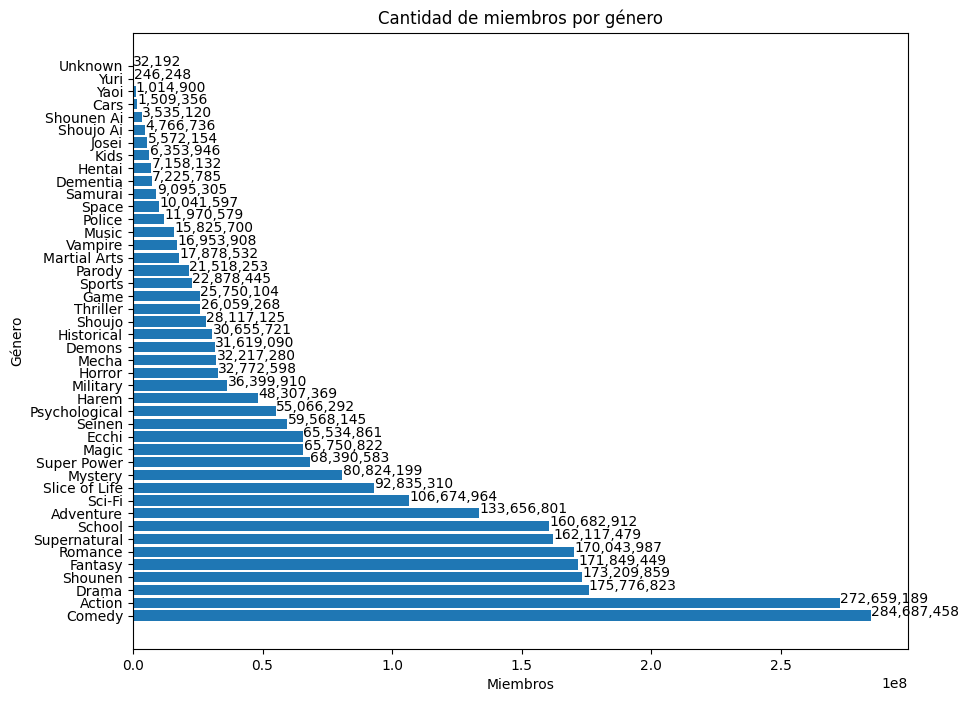

In [144]:
#Genero el gráfico de popularidad

plt.figure(figsize=(10,8))
# Crea un gráfico de barras horizontales con la Serie 'miembros_por_genero'
barras = plt.barh(miembros_por_genero.index, miembros_por_genero['Members'])

# Agrega un título al gráfico
plt.title('Cantidad de miembros por género')

# Agrega una etiqueta al eje x
plt.xlabel('Miembros')

# Agrega una etiqueta al eje y
plt.ylabel('Género')

# Agrega una etiqueta del valor en cada barra
for barra in barras:
  # Obtiene la posición y el valor de la barra
  x = barra.get_width()
  y = barra.get_y()
  valor = int(x)

  # Agrega el texto con el valor de la barra
  plt.text(x + 100000, y + 0.4, f'{valor:,}')

# Muestra el gráfico
plt.show()

In [145]:
#Encuentro el porcentaje del total que ven series de cada género
miembros_por_genero ['%del Total']=grupos['Members'].sum()/anime_con_dummies['Members'].sum()
#Parametrizo para conocer la cantidad de animés por género que debiera tener mi lista, dependiendo del número de recomendaciones
miembros_por_genero['%List_Recom']= miembros_por_genero['%del Total']/miembros_por_genero['%del Total'].sum()

In [146]:
miembros_por_genero.head()

,Members,%del Total,%List_Recom
genero,,,
Comedy,284687458,0.467718,0.103342
Action,272659189,0.447957,0.098976
Drama,175776823,0.288787,0.063807
Shounen,173209859,0.284570,0.062876
Fantasy,171849449,0.282334,0.062382


##Como el mayor porcentaje no supera el 10 % entonces la lista debiera,al menos, tener un capítulo de cada género que encabeza la lista de géneros más populares.

#Obtención de la Lista
Se establecerá una lista que tendrá 3 niveles de profundidad según: (Sólo se concretó la lista automática)
>Una Lista genérica que se utilizará como base habiendo tenido en cuenta todos los aspectos mencionados para generar la jerarquia de una Lista automática<
Una Lista que Priorice sólo los géneros seleccionados de una lista de preferencia del nuevo usuario<
>Una Lista automática mejorada que respete una distibución de acuerdo a la popularidad de cadaa género.<

##Lista automática de recomendación de animés


In [147]:
#Todos los valores de importancia quedaron guardados en el Dataset anime_largo y
#Primera lista sale de simplemente ordenar los valores según el indicador generado previamente
#df = df.loc[df['nombre_de_tu_columna'] == 'Movie']
ListAuto_Mov = anime_con_dummies.loc[anime_con_dummies['Type']=='Movie']
ListAuto_Mov= ListAuto_Mov.sort_values('Priori_AUTO', ascending=False)
ListAuto_Mov.head(10)

,MAL_ID,Name,Score,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri,SumaProb,Popul_Anim_Param,%Droppeo,%Drop_Param,%OnHold,%OnH_Param,PTWatch_Param,Score_Param,ProbP_Gen,Priori_AUTO
16167,40456,Kimetsu no Yaiba Movie: Mugen Ressha-hen,8.72,NaN,劇場版 鬼滅の刃 無限列車編,Movie,1,"Oct 16, 2020",NaN,"Aniplex, Shueisha",Aniplex of America,ufotable,Manga,1 hr. 57 min.,R - 17+ (violence & profanity),40.0,398,341006,4034,9994,41603,3118,378,285913,13267.0,10226.0,7525.0,2894.0,797.0,365.0,116.0,62.0,82.0,557.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.179364,0.000672,0.001108,0.000672,0.009144,0.000672,0.671897,0.948857,0.335317,2.076597
11308,32281,Kimi no Na wa.,8.96,Your Name.,君の名は。,Movie,1,"Aug 26, 2016",NaN,"Toho, Sound Team Don Juan, Amuse, JR East Mark...","Funimation, NYAV Post",CoMix Wave Films,Original,1 hr. 46 min.,PG-13 - Teens 13 or older,16.0,11,1726660,71054,40773,1462143,4746,2463,216535,516874.0,333022.0,200239.0,86314.0,29641.0,12257.0,5199.0,2131.0,1116.0,3966.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.151987,0.002234,0.001426,0.002234,0.002749,0.002234,0.508858,0.974973,0.284136,1.914507
4970,7311,Suzumiya Haruhi no Shoushitsu,8.65,The Disappearance of Haruhi Suzumiya,涼宮ハルヒの消失,Movie,1,"Feb 6, 2010",NaN,"Kadokawa Shoten, Animation Do","Funimation, Bandai Entertainment",Kyoto Animation,Light novel,2 hr. 42 min.,PG-13 - Teens 13 or older,54.0,243,486871,11585,11330,322186,4922,3853,144580,73646.0,78831.0,58615.0,28234.0,9268.0,3358.0,1106.0,399.0,282.0,692.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.285689,0.000607,0.007914,0.000607,0.010109,0.000607,0.339764,0.941240,0.534090,1.864081
9886,28851,Koe no Katachi,9.00,A Silent Voice,聲の形,Movie,1,"Sep 17, 2016",NaN,"Shochiku, Pony Canyon, Kodansha, ABC Animation...","Eleven Arts, NYAV Post",Kyoto Animation,Manga,2 hr. 10 min.,PG-13 - Teens 13 or older,11.0,28,1387607,62452,30379,1151644,4306,1949,199329,393684.0,295492.0,156604.0,61581.0,19228.0,7135.0,3108.0,1242.0,698.0,2071.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.124629,0.001979,0.001405,0.001979,0.003103,0.001979,0.468424,0.979325,0.232992,1.846013
13915,36862,Made in Abyss Movie 3: Fukaki Tamashii no Reimei,8.74,NaN,劇場版メイドインアビス 深き魂の黎明,Movie,1,"Jan 17, 2020",NaN,NaN,Sentai Filmworks,Kinema Citrus,Web manga,1 hr. 45 min.,R - 17+ (violence & profanity),35.0,682,216416,1546,4357,85039,1280,356,125384,19396.0,25707.0,16909.0,5248.0,1533.0,486.0,237.0,108.0,70.0,166.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.242156,0.001038,0.001645,0.001038,0.005915,0.001038,0.294653,0.951034,0.452706,1.778745
14671,38040,Kono Subarashii Sekai ni Shukufuku wo!: Kurena...,8.52,KONOSUBA -God's blessing on this wonderful wor...,この素晴らしい世界に祝福を！紅伝説,Movie,1,"Aug 30, 2019",NaN,NaN,NaN,J.C.Staff,Light novel,1 hr. 30 min.,PG-13 - Teens 13 or older,98.0,321,418555,3814,9060,313650,2210,1477,92158,50275.0,83232.0,75715.0,28186.0,7148.0,2237.0,751.0,325.0,161.0,300.0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.308211,0.001163,0.003529,0.001163,0.005280,0.001163,0.216572,0.927095,0.576195,1.751133
14619,37987,Violet Evergarden Movie,8.65,NaN,劇場版 ヴァイオレット・エヴァーガーデン,Movie,1,"Sep 18, 2020",NaN,Shochiku,NaN,Kyoto Animati

In [148]:
ListAuto_TV = anime_con_dummies.loc[anime_con_dummies['Type']=='TV']
ListAuto_TV= ListAuto_TV.sort_values('Priori_AUTO', ascending=False)
ListAuto_TV.head(10)

,MAL_ID,Name,Score,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri,SumaProb,Popul_Anim_Param,%Droppeo,%Drop_Param,%OnHold,%OnH_Param,PTWatch_Param,Score_Param,ProbP_Gen,Priori_AUTO
3971,5114,Fullmetal Alchemist: Brotherhood,9.19,Fullmetal Alchemist:Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,24 min. per ep.,R - 17+ (violence & profanity),1.0,3,2248456,183914,171871,1644938,75728,32456,323463,714811.0,401507.0,199160.0,70045.0,20210.0,9308.0,3222.0,1536.0,2162.0,16806.0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.446430,0.000182,0.014435,0.000182,0.033680,0.000182,0.760140,1.000000,0.834592,2.552807
0,1,Cowboy Bebop,8.78,Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.369491,0.000108,0.021309,0.000108,0.057121,0.000108,0.775032,0.955386,0.690757,2.418364
5683,9253,Steins;Gate,9.11,Steins;Gate,STEINS;GATE,TV,24,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,"Frontier Works, Media Factory, Movic, AT-X, Ka...",Funimation,White Fox,Visual novel,24 min. per ep.,PG-13 - Teens 13 or older,3.0,9,1771162,148452,114349,1134756,60926,35600,425531,468504.0,275960.0,140914.0,57740.0,21375.0,11126.0,5061.0,2292.0,1678.0,5255.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.053998,0.000179,0.020100,0.000179,0.034399,0.000179,1.000000,0.991295,0.100948,2.304914
833,918,Gintama,8.96,Gintama,銀魂,TV,201,"Apr 4, 2006 to Mar 25, 2010",Spring 2006,"TV Tokyo, Aniplex, Dentsu, Trinity Sound, Audi...","Sentai Filmworks, Crunchyroll",Sunrise,Manga,24 min. per ep.,PG-13 - Teens 13 or older,15.0,114,754607,48247,149543,230260,87145,39531,248128,108448.0,74869.0,52666.0,27675.0,11208.0,6423.0,2934.0,1299.0,850.0,2743.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.328465,0.000053,0.052386,0.000053,0.115484,0.000053,0.583102,0.974973,0.614060,2.201010
1822,2001,Tengen Toppa Gurren Lagann,8.66,Gurren Lagann,天元突破グレンラガン,TV,27,"Apr 1, 2007 to Sep 30, 2007",Spring 2007,"TV Tokyo, Aniplex, Dentsu, Konami, Half H.P St...","ADV Films, Bandai Entertainment, Aniplex of Am...",Gainax,Original,24 min. per ep.,PG-13 - Teens 13 or older,52.0,46,1213765,67916,70769,805570,56386,42030,239010,222328.0,195507.0,149742.0,76985.0,28213.0,13538.0,5750.0,2375.0,1350.0,2049.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.329440,0.000132,0.034628,0.000132,0.046455,0.000132,0.561675,0.942329,0.615882,2.140041
6474,11061,Hunter x Hunter (2011),9.10,Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,TV,148,"Oct 2, 2011 to Sep 24, 2014",Fall 2011,"VAP, Nippon Television Network, Shueisha",VIZ Media,Madhouse,Manga,23 min. per ep.,PG-13 - Teens 13 or older,6.0,12,1673924,147274,227277,1094486,79587,31652,240922,454000.0,304741.0,167331.0,65085.0,18241.0,7789.0,2780.0,1243.0,1054.0,4602.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0.25

In [149]:
ListAuto_OVA = anime_con_dummies.loc[anime_con_dummies['Type']=='OVA']
ListAuto_OVA= ListAuto_OVA.sort_values('Priori_AUTO', ascending=False)
ListAuto_OVA.head(10)

,MAL_ID,Name,Score,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri,SumaProb,Popul_Anim_Param,%Droppeo,%Drop_Param,%OnHold,%OnH_Param,PTWatch_Param,Score_Param,ProbP_Gen,Priori_AUTO
203,227,FLCL,8.03,FLCL,フリクリ,OVA,6,"Apr 26, 2000 to Mar 16, 2001",NaN,"Starchild Records, GANSIS","Funimation, Synch-Point","Gainax, Production I.G",Original,25 min. per ep.,PG-13 - Teens 13 or older,505.0,171,610114,23432,21496,409775,15250,13319,150274,73488.0,73911.0,82013.0,55189.0,25030.0,12152.0,6542.0,3043.0,2162.0,2112.0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.300790,0.000246,0.021830,0.000246,0.024995,0.000246,0.353145,0.873776,0.562321,1.811119
741,820,Ginga Eiyuu Densetsu,9.07,Legend of the Galactic Heroes,銀河英雄伝説,OVA,110,"Jan 8, 1988 to Mar 17, 1997",NaN,"Kitty Films, K-Factory",Sentai Filmworks,"Artland, Magic Bus",Novel,26 min. per ep.,R - 17+ (violence & profanity),7.0,633,230168,13834,25968,52583,14911,5950,130756,30432.0,11497.0,7096.0,3577.0,1570.0,965.0,480.0,264.0,509.0,2265.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.124808,0.000095,0.025851,0.000095,0.064783,0.000095,0.307277,0.986942,0.233327,1.692713
708,777,Hellsing Ultimate,8.40,Hellsing Ultimate,HELLSING OVA,OVA,10,"Feb 10, 2006 to Dec 26, 2012",NaN,"Geneon Universal Entertainment, StudioRF Inc.,...","Funimation, Geneon Entertainment USA","Madhouse, Satelight, Graphinica",Manga,50 min. per ep.,R - 17+ (violence & profanity),154.0,143,676023,18134,61371,406085,35477,17217,155873,84495.0,100315.0,94259.0,49044.0,16994.0,6719.0,3006.0,1217.0,611.0,886.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.146654,0.000117,0.025468,0.000117,0.052479,0.000117,0.366302,0.914037,0.274168,1.687175
25,44,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,8.73,Samurai X:Trust and Betrayal,るろうに剣心―明治剣客浪漫譚―追憶編,OVA,4,"Feb 20, 1999 to Sep 22, 1999",NaN,Aniplex,"ADV Films, Aniplex of America",Studio Deen,Manga,30 min. per ep.,R - 17+ (violence & profanity),37.0,637,228484,6111,6359,150183,3124,1836,66982,39845.0,33317.0,25800.0,11782.0,3575.0,1393.0,448.0,163.0,106.0,490.0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.242335,0.000449,0.008036,0.000449,0.013673,0.000449,0.157408,0.949946,0.453041,1.639766
856,949,Top wo Nerae! Gunbuster,7.89,Gunbuster,トップをねらえ！ GunBuster,OVA,6,"Oct 7, 1988 to Jul 7, 1989",NaN,"Studio Fantasia, Tohokushinsha Film Corporation",Bandai Visual USA,Gainax,Original,30 min. per ep.,R+ - Mild Nudity,684.0,1424,97623,2322,3438,51343,1969,1090,39783,5930.0,9227.0,12665.0,8687.0,3477.0,1426.0,691.0,312.0,130.0,100.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.383876,0.000304,0.011165,0.000304,0.020169,0.000304,0.093490,0.858542,0.717649,1.633444
3892,4938,Tsubasa: Shunraiki,8.13,Tsubasa RESERVoir CHRoNiCLE:Spring Thunder Chr...,ツバサ 春雷記,OVA,2,"Mar 17, 2009 to May 15, 2009",NaN,Kodansha,Funimation,Production I.G,NaN,29 min. per ep.,R - 17+ (violence & profanity),383.0,2118,55155,306,1170,38788,762,454,13981,4738.0,6561.0,8069.0,5065.0,1749.0,691.0,186.0,74.0,32.0,62.0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.396689,0.000444,0.008231,0.000444,0.013816,0.000444,0.032855,0.884657,0.741603,1.621164
4307,5781,Isekai no Seikishi Monogatari,7.84,Tenc

In [153]:
ListAuto_Special = anime_con_dummies.loc[anime_con_dummies['Type']=='Special']
ListAuto_Special= ListAuto_Special.sort_values('Priori_AUTO', ascending=False)
ListAuto_Special.head(10)

,MAL_ID,Name,Score,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri,SumaProb,Popul_Anim_Param,%Droppeo,%Drop_Param,%OnHold,%OnH_Param,PTWatch_Param,Score_Param,ProbP_Gen,Priori_AUTO
8014,19123,One Piece: Episode of Merry - Mou Hitori no Na...,8.21,NaN,ワンピース エピソード・オブ・メリー ～もうひとりの仲間の物語～,Special,1,"Aug 24, 2013",NaN,Fuji TV,NaN,Toei Animation,Manga,1 hr. 46 min.,PG-13 - Teens 13 or older,300.0,2427,43561,172,1019,35531,315,340,6356,5378.0,4782.0,6193.0,3707.0,1426.0,465.0,161.0,61.0,79.0,273.0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0.426036,0.000849,0.007805,0.000849,0.007231,0.000849,0.014937,0.893362,0.796466,1.650193
7247,15323,One Piece: Episode of Nami - Koukaishi no Nami...,8.15,NaN,ワンピースエピソード・オブ・ナミ～航海士の涙と仲間の絆～,Special,1,"Aug 25, 2012",NaN,Fuji TV,NaN,Toei Animation,Manga,1 hr. 46 min.,PG-13 - Teens 13 or older,366.0,2222,51712,236,936,44343,321,329,5783,5668.0,6489.0,8679.0,5248.0,1769.0,636.0,163.0,73.0,70.0,279.0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0.426036,0.000989,0.006362,0.000989,0.006207,0.000989,0.013590,0.886834,0.796466,1.640826
13489,36215,One Piece: Episode of East Blue - Luffy to 4-n...,7.91,NaN,ワンピース エピソードオブ東の海[イーストブルー] ~ルフィと4人の仲間の大冒険~,Special,1,"Aug 26, 2017",NaN,NaN,Funimation,Toei Animation,Manga,1 hr. 46 min.,PG-13 - Teens 13 or older,661.0,3431,22748,20,619,18148,216,201,3564,1826.0,2028.0,3776.0,2763.0,925.0,331.0,69.0,39.0,15.0,40.0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0.426036,0.000647,0.008836,0.000647,0.009495,0.000647,0.008375,0.860718,0.796466,1.602624
10897,31289,One Piece: Episode of Sabo - 3 Kyoudai no Kizu...,7.72,NaN,ワンピース エピソード オブ サボ ～３兄弟の絆 奇跡の再会と受け継がれる意志～,Special,1,"Aug 22, 2015",NaN,Fuji TV,Funimation,Toei Animation,Manga,1 hr. 46 min.,PG-13 - Teens 13 or older,970.0,3059,28531,32,570,23554,264,195,3948,2313.0,2340.0,4401.0,3888.0,1515.0,590.0,222.0,76.0,43.0,75.0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0.426036,0.000664,0.006835,0.000664,0.009253,0.000664,0.009278,0.840044,0.796466,1.577700
2608,2832,Ani*Kuri15,6.79,NaN,アニ＊クリ15,Special,15,"Jun 7, 2007 to Jun 27, 2007",NaN,NaN,NaN,"Gonzo, Gainax, Production I.G, Madhouse, Studi...",Original,1 min. per ep.,PG-13 - Teens 13 or older,4465.0,3724,19330,10,412,12204,401,227,6086,340.0,725.0,1767.0,2820.0,2004.0,1017.0,312.0,120.0,55.0,43.0,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0.519946,0.000296,0.011743,0.000296,0.020745,0.000296,0.014302,0.738847,0.972029,1.569975
4612,6489,Zero no Tsukaima: Princesses no Rondo Picture ...,6.95,NaN,ゼロの使い魔～三美姫の輪舞～ ピクチャードラマ,Special,7,"Sep 25, 2008 to Mar 25, 2009",NaN,NaN,NaN,J.C.Staff,Light novel,3 min. per ep.,PG-13 - Teens 13 or older,3812.0,2497,41478,89,945,30067,515,665,9286,2358.0,1746.0,3022.0,4588.0,3241.0,1851.0,832.0,406.0,254.0,212.0,1,1,0,1,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.488769,0.000495,0.016033,0.000495,0.012416,0.000495,0.021822,0.756257,0.913744,1.561572
11848,33338,One Piece: Heart of Gold,7.53,NaN,ワンピース ～ハートオブ ゴールド～,Special,1,"Jul 16, 2016",NaN,NaN,Funimation,Toei Animation,Manga,1 hr. 44 min.,PG-13 - Teens 13 or older,1489.0,2295,48588,48,822,38520,308,185,8753,2819.0,3297.0,7170.0,7847.0,3184.0,1170.0,380.0,137.0,71.0,50.0,1,1,0,1,0,0,1

In [151]:
ListAuto_ONA = anime_con_dummies.loc[anime_con_dummies['Type']=='ONA']
ListAuto_ONA= ListAuto_ONA.sort_values('Priori_AUTO', ascending=False)
ListAuto_ONA.head(10)

,MAL_ID,Name,Score,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri,SumaProb,Popul_Anim_Param,%Droppeo,%Drop_Param,%OnHold,%OnH_Param,PTWatch_Param,Score_Param,ProbP_Gen,Priori_AUTO
15941,40052,Great Pretender,8.38,NaN,NaN,ONA,23,"Jun 2, 2020 to Sep 21, 2020",NaN,"Production I.G, Fuji TV, BS Fuji, TOHO animati...",NaN,Wit Studio,Original,23 min. per ep.,R - 17+ (violence & profanity),164.0,520,273035,4324,53269,115973,11954,5251,86588,18057.0,38486.0,39088.0,16153.0,4521.0,1682.0,678.0,261.0,105.0,314.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.277472,0.000140,0.019232,0.000140,0.043782,0.000140,0.203482,0.911861,0.518728,1.680622
14120,37208,Mo Dao Zu Shi,8.50,NaN,魔道祖师,ONA,15,"Jul 9, 2018 to Oct 6, 2018",NaN,Tencent Penguin Pictures,NaN,B.CMAY PICTURES,Novel,24 min. per ep.,R - 17+ (violence & profanity),107.0,1122,131604,4337,12201,49180,3913,3984,62326,11634.0,10984.0,10183.0,5110.0,1796.0,842.0,357.0,163.0,108.0,455.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.202841,0.000207,0.030273,0.000207,0.029733,0.000207,0.146466,0.924918,0.379208,1.549306
16407,40861,Hakumei no Tsubasa,7.61,Pokemon:Twilight Wings,薄明の翼,ONA,7,"Jan 15, 2020 to Aug 6, 2020",NaN,NaN,NaN,"Studio Colorido, FILMONY",Game,6 min. per ep.,PG - Children,1252.0,4543,12163,69,1656,7742,379,222,2164,586.0,905.0,2167.0,2053.0,688.0,218.0,47.0,29.0,12.0,16.0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.374525,0.000197,0.018252,0.000197,0.031160,0.000197,0.005085,0.828074,0.700167,1.495484
12843,35120,Devilman: Crybaby,7.84,Devilman:Crybaby,DEVILMAN crybaby,ONA,10,"Jan 5, 2018",NaN,"Aniplex, Dynamic Planning, Netflix",NaN,Science SARU,Manga,25 min. per ep.,R+ - Mild Nudity,751.0,153,650309,14561,29665,477257,13336,18054,111997,59124.0,90144.0,109879.0,73102.0,32020.0,14397.0,9140.0,4183.0,2944.0,3329.0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.136129,0.000299,0.027762,0.000299,0.020507,0.000299,0.263194,0.853101,0.254491,1.495289
9727,28149,Nihon Animator Mihonichi,7.39,Japan Anima(tor)'s Exhibition,日本アニメ（ーター）見本市,ONA,35,"Nov 7, 2014 to Oct 9, 2015",NaN,Dwango,NaN,"Khara, Trigger, Studio Colorido",Original,8 min. per ep.,R+ - Mild Nudity,1920.0,2896,31633,100,4083,10385,3767,1671,11727,888.0,1281.0,2819.0,2894.0,1229.0,573.0,146.0,59.0,37.0,52.0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0.369511,0.000052,0.052825,0.000052,0.119085,0.000052,0.027559,0.804135,0.690794,1.481795
14891,38409,Cike Wu Liuqi,7.91,Scissor Seven,刺客伍六七,ONA,10,"Apr 25, 2018 to Jun 20, 2018",NaN,NaN,NaN,NaN,Original,14 min. per ep.,R - 17+ (violence & profanity),665.0,3830,18021,292,995,10775,352,416,5483,1180.0,1793.0,3000.0,2048.0,627.0,228.0,87.0,36.0,19.0,30.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.322696,0.000314,0.023084,0.000314,0.019533,0.000314,0.012885,0.860718,0.603273,1.481225
16360,40784,Wu Liuqi Zhi Zui Qiang Fa Xing Shi,8.23,Scissor Seven,伍六七之最强发型师,ONA,10,"Oct 23, 2019 to Jan 1, 2020",NaN,NaN,NaN,NaN,Original,15 min. per ep.,R - 17+ (violence & profanity),285.0,4581,11978,160,567,8762,154,157,2338,1181.0,1863.0,2453.0,1140.0,293.0,90.0,37.0,19.0,6.0,20.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0

In [152]:
anime_con_dummies['Type'].unique()

array(['TV', 'Movie', 'OVA', 'Special', 'ONA', 'Music', nan], dtype=object)

In [163]:
#Exportación de Listas
ListAuto_Mov20 = ListAuto_Mov['Name'].head(20).to_frame()
ListAuto_TV20 = ListAuto_TV['Name'].head(20)
ListAuto_OVA20 = ListAuto_OVA['Name'].head(20)
ListAuto_Special20 = ListAuto_Special['Name'].head(20)
ListAuto_ONA20 = ListAuto_ONA['Name'].head(20)


In [166]:
#Guardo en CSV
ListAuto_Mov20.to_csv('ListAuto_Mov20.csv',index=False)
ListAuto_TV20.to_csv('ListAuto_TV20.csv',index=False)
ListAuto_OVA20.to_csv('ListAuto_OVA20.csv',index=False)
ListAuto_Special20.to_csv('ListAuto_Special20.csv',index=False)
ListAuto_ONA20.to_csv('ListAuto_ONA20.csv',index=False)

#Limpieza de la Sinopsis para la comparación de series


In [152]:
#No se llegó